<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/KAPUR-S-ENTROPY/blob/master/KAPUR'S_ENTROPY_FOR_FOUR_THRESHOLD_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAPUR'S ENTROPY FOR FOUR THRESHOLD VALUES

# IMPORTING THE LIBRARIES

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# READ AN IMAGE AND CONVERT IT INTO GREYSCALE

In [2]:
image = Image.open('lena.tiff').convert("L")
print(image)

<PIL.Image.Image image mode=L size=512x512 at 0x7F7CB1B3EB70>


# DEFINE THE THRESHOLD VALUES

In [0]:
thresholds=[64,97,137,179]
thresholds.append(255)
thresholds.insert(0,0)

# CONVERT IMAGE INTO ARRAY

In [4]:
img = np.asarray(image)#Convert given input into array
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


# MAKING HISTOGRAM

In [0]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

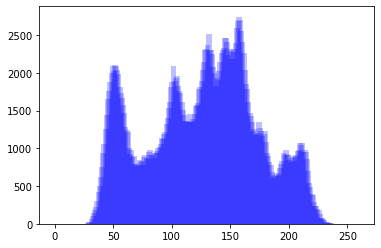

In [6]:
h=Hist(img)

# COUNTING THE PIXELS

In [7]:
cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


# FINDING PROBABILITIES OF AN INDIVIDUAL PIXELS

In [0]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])

# KAPUR'S ENTROPY CALCULATION

In [0]:
w0=prob[:]

In [10]:
SUM=[]
for i in range(len(thresholds)-1):
    SUM.append(sum(h[thresholds[i]:thresholds[i+1]]))
    
print(SUM)

[0.16226959228515625, 0.12503814697265625, 0.2763481140136719, 0.3064155578613281, 0.1299285888671875]


In [11]:
print(w0[64])
print(w0[97])
print(w0[137])
print(w0[179])

0.00335693359375
0.006893157958984375
0.007259368896484375
0.00359344482421875


In [0]:

for i in range(0,w0.index(0.00335693359375)):
    w0[i]=w0[i]/SUM[0]
for i in range(w0.index(0.00335693359375),w0.index(0.006893157958984375)):
    w0[i]=w0[i]/SUM[1]
for i in range(w0.index(0.006893157958984375),w0.index(0.007259368896484375)):
    w0[i]=w0[i]/SUM[2]
    
for i in range(w0.index(0.007259368896484375),w0.index(0.00359344482421875)):
    w0[i]=w0[i]/SUM[3]
for i in range(w0.index(0.00359344482421875),256):
    w0[i]=w0[i]/SUM[4]

In [13]:
print(w0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3508392496121114e-05, 0.0001645587474728478, 0.0004466594574263012, 0.0006817433823875123, 0.0013869951572711458, 0.0022803140721237482, 0.0032206497719685927, 0.004278527434294043, 0.005195354741642766, 0.0070290093563402135, 0.00992054163336311, 0.011730687855564437, 0.014434152992618365, 0.017819361512059807, 0.022191922516338333, 0.024918896045888383, 0.029503032582632, 0.03387559358691053, 0.0387418308336076, 0.041374770793173164, 0.04428981146269218, 0.04696976820724999, 0.04913254031689313, 0.047557478019653016, 0.049391132634350465, 0.04908552353190089, 0.047722036767125865, 0.046499600357327565, 0.042503173632986974, 0.04066951901828953, 0.03921199868353002, 0.037072734966383, 0.03453382857680192, 0.030043725610042784, 0.0290563731252057, 0.028680238845267762, 0.02357891767360948, 0.021862805021392637, 0.022920682683718087, 0.026847275611690768, 0.027

In [0]:
w1=prob[:]

In [0]:
for i in range(0,w1.index(0.00335693359375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[0])
for i in range(w1.index(0.00335693359375),w1.index(0.006893157958984375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[1])
for i in range(w1.index(0.006893157958984375),w1.index(0.007259368896484375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[2])
for i in range(w1.index(0.007259368896484375),w1.index(0.00359344482421875)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[3])
    
for i in range(w1.index(0.00359344482421875),256):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[4])



In [16]:
print(w1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.658153073074491, -8.712242924019177, -7.71371409390805, -7.290857243088016, -6.580615629168771, -6.083442094571107, -5.738172147246366, -5.454146385997695, -5.2599903715567375, -4.957709499683804, -4.613147759038479, -4.445546977322971, -4.238158144927348, -4.027469687432118, -3.8080269069289896, -3.6921288859683776, -3.523262221508606, -3.385060477074968, -3.2508353626050734, -3.1850839850422927, -3.117000617938182, -3.0582511138659916, -3.0132337281156336, -3.0458162359067447, -3.00798437222949, -3.014191124071961, -3.0423620010386574, -3.068311560891833, -3.1581765321223685, -3.2022763855826657, -3.238772490155798, -3.294873486111452, -3.365815896900613, -3.5051014381370105, -3.5385174350568542, -3.5515469353471882, -3.747402285112555, -3.8229684869271887, -3.775715602076643, -3.6175909301515206, -3.6029262567472737, -3.7267465167778986, -3.71540424017396

In [17]:
mul=[]
for i in range(len(w0)):
    mul.append(w0[i]*w1[i])
    
print(mul)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00025055604572557456, -0.001433675783255777, -0.0034454033519265817, -0.004970493677407317, -0.0091272820095199, -0.013872158615200466, -0.018480642817545537, -0.023335714943146846, -0.02732751591786259, -0.03484778645929422, -0.04576492440439696, -0.05214932393822377, -0.061174223070792975, -0.07176693833921542, -0.08450743805869966, -0.09200377589746768, -0.1039469201183248, -0.11467093298850509, -0.12594331368595518, -0.13178211983813146, -0.13805136969757711, -0.14364534593784972, -0.14804782763086358, -0.1448513386910373, -0.14856775509084016, -0.14795314935028103, -0.14518771127247343, -0.1426752613532382, -0.13423252550842169, -0.13023504036527367, -0.1269987426202424, -0.12214997149837227, -0.11623450920464057, -0.10530630584275469, -0.10281648290305778, -0.1018592143759361, -0.08835968997056497, -0.08358081463261756, -0.08654197921916232, -0.09712246

In [18]:
kapur_entropy=[]
for i in range(len(thresholds)-1):
    kapur_entropy.append(-(sum(mul[thresholds[i]:thresholds[i+1]])))
    
print(kapur_entropy)

[3.3780961751258025, 3.475162815646841, 3.6716386936787715, 3.6960369487137457, 3.7914616773338015]


# RESULTS

In [19]:
J=sum(kapur_entropy)
print(J)

18.01239631049896
